In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("spotify_tracks.csv")
print(df.head)

<bound method NDFrame.head of                      track_id                                  track_name  \
0      2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1      4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2      59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3      5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4      1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   
...                       ...                                         ...   
62312  3eHDwMQYPEziy2DWRBNoLv                        Sani - G.O.A.T Remix   
62313  5hHtCqkNv5eo99OrEFFcgS                            Life of Bachelor   
62314  08foF9YHgKmIgOy3xMWRZy                                     Yo Baby   
62315  2wLFbVlQGKJSd9lwzwL47F                           Fast Fast Vadiley   
62316  5OYxwYeFfumMTAoAdVeet3             Moonu Moonu Moonu (From "3:33")   

                                             

In [15]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness','loudness', 'speechiness', 'tempo', 'valence', 'popularity']
X = df[features]

print(X.describe())


       acousticness  danceability        energy  instrumentalness  \
count  62317.000000  62317.000000  62317.000000      62317.000000   
mean       0.362292      0.596807      0.602496          0.146215   
std        0.314609      0.186209      0.246144          0.307804   
min       -1.000000     -1.000000     -1.000000         -1.000000   
25%        0.067100      0.497000      0.440000          0.000000   
50%        0.286000      0.631000      0.639000          0.000025   
75%        0.632000      0.730000      0.803000          0.015200   
max        0.996000      0.986000      1.000000          0.999000   

           liveness       loudness   speechiness         tempo       valence  \
count  62317.000000   62317.000000  62317.000000  62317.000000  62317.000000   
mean       0.194143     -65.103433      0.087722    117.931247      0.495226   
std        0.172030    2369.051478      0.115150     28.509459      0.264787   
min       -1.000000 -100000.000000     -1.000000     -1.00

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=features).describe())


       acousticness  danceability        energy  instrumentalness  \
count  6.231700e+04  6.231700e+04  6.231700e+04      6.231700e+04   
mean   1.058112e-16  4.378395e-17  1.459465e-16     -7.297324e-17   
std    1.000008e+00  1.000008e+00  1.000008e+00      1.000008e+00   
min   -4.330140e+00 -8.575432e+00 -6.510441e+00     -3.723881e+00   
25%   -9.382876e-01 -5.359983e-01 -6.601720e-01     -4.750292e-01   
50%   -2.424985e-01  1.836304e-01  1.483027e-01     -4.749467e-01   
75%    8.572869e-01  7.152964e-01  8.145834e-01     -4.256467e-01   
max    2.014287e+00  2.090109e+00  1.614933e+00      2.770573e+00   

           liveness      loudness   speechiness         tempo       valence  \
count  6.231700e+04  6.231700e+04  6.231700e+04  6.231700e+04  6.231700e+04   
mean   8.756789e-17 -4.560828e-18 -5.837859e-17 -2.736497e-17  2.189197e-17   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -6.941516e+00 -4.218384e+01 -9.446224e+00 -4.171675e+00 

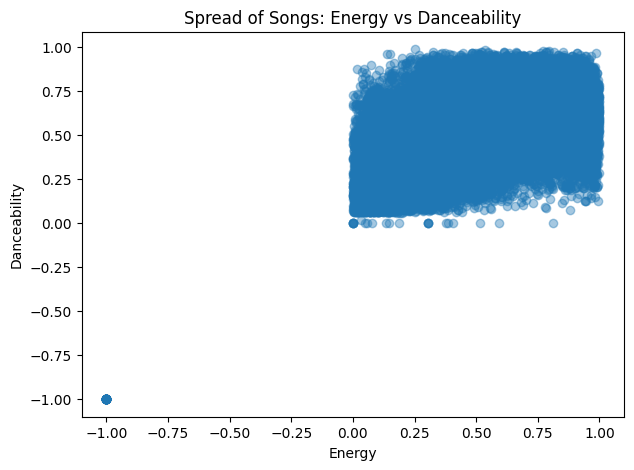

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['energy'], df['danceability'], alpha=0.4)
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Spread of Songs: Energy vs Danceability')
plt.show()

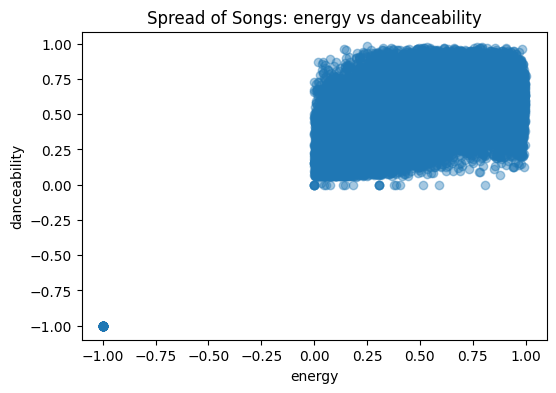

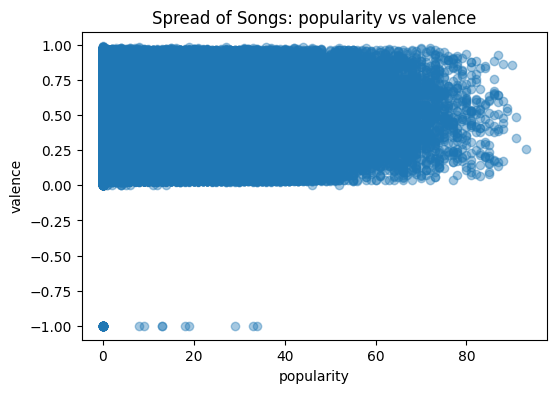

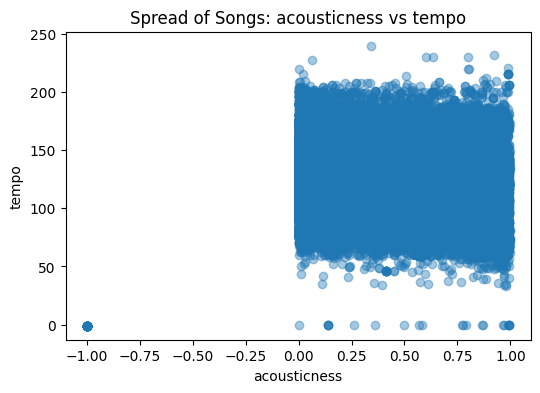

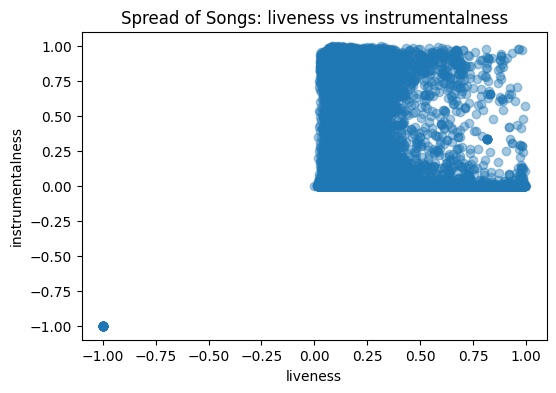

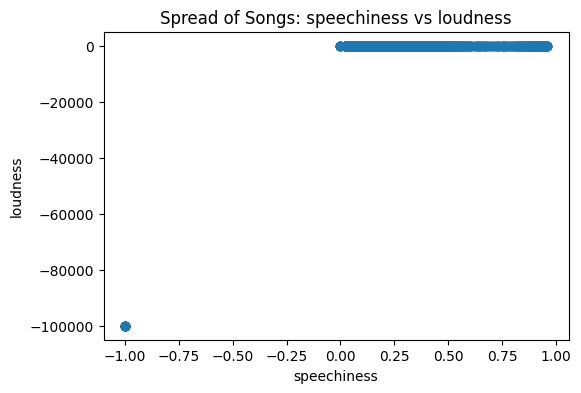

In [18]:
import matplotlib.pyplot as plt

feature_pairs = [
    ('energy', 'danceability'),
    ('popularity', 'valence'),
    ('acousticness', 'tempo'),
    ('liveness', 'instrumentalness'),
    ('speechiness', 'loudness')
]

for x, y in feature_pairs:
    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y], alpha=0.4)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Spread of Songs: {x} vs {y}')
    plt.show()


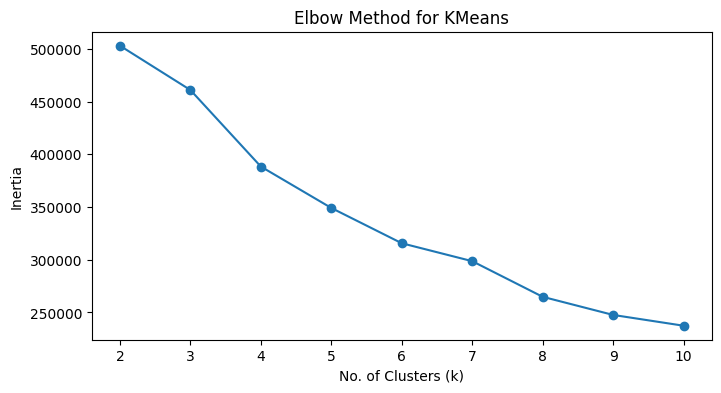

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

In [20]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

for n in range(chosen_k):
    print(f"\nCluster {n} sample:")
    print(df[df['cluster'] == n][['track_name', 'artist_name', 'year', 'popularity', 'language']].head())



Cluster 0 sample:
                                 track_name  \
0                Leo Das Entry (From "Leo")   
1                              AAO KILLELLE   
2    Mayakiriye Sirikiriye - Orchestral EDM   
5   Villain Yevadu Ra (From "Leo (Telugu)")   
11    Villain Kaun Hai (From "Leo (Hindi)")   

                                          artist_name  year  popularity  \
0                                 Anirudh Ravichander  2024          59   
1   Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2            Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
5   Anirudh Ravichander, Manisha Eerabathini, Samp...  2024          26   
11  Anirudh Ravichander, Manisha Eerabathini, Samp...  2024          34   

   language  
0     Tamil  
1     Tamil  
2     Tamil  
5    Telugu  
11    Hindi  

Cluster 1 sample:
                                           track_name  \
8                          Rathamaarey (LoFi Version)   
9                            T

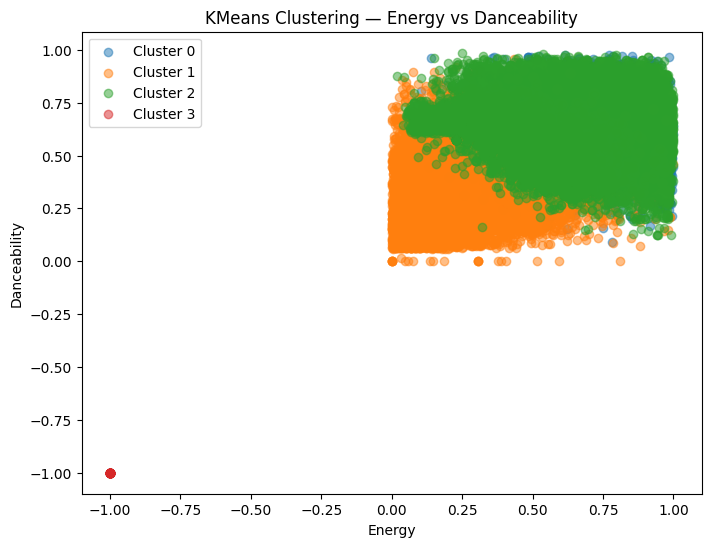

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(chosen_k):
    subset = df[df['cluster'] == i]
    plt.scatter(subset['energy'], subset['danceability'], label=f'Cluster {i}', alpha=0.5)

plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('KMeans Clustering — Energy vs Danceability')
plt.legend()
plt.show()

In [22]:
print(df.groupby('cluster')[features + ['popularity']].mean())

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.219760      0.645348  0.720205          0.033924  0.196301   
1            0.667536      0.384565  0.310163          0.447831  0.150688   
2            0.293041      0.670511  0.680405          0.064676  0.213671   
3           -1.000000     -1.000000 -1.000000         -1.000000 -1.000000   

              loudness  speechiness       tempo   valence  popularity  \
cluster                                                                 
0            -6.168527     0.083850  120.801093  0.539535   42.421772   
1           -14.697341     0.045143  110.735378  0.202065   10.780977   
2            -7.651620     0.109475  119.946060  0.606549    5.167868   
3       -100000.000000    -1.000000   -1.000000 -1.000000    5.028571   

         popularity  
cluster              
0         42.421772  
1         10.780977  
2         

In [23]:
import joblib
joblib.dump(kmeans, "kmeans_model.joblib")
joblib.dump(scaler, "scaler_model.joblib")

['scaler_model.joblib']